Venda de carros.
- sold: vendido ou não

Features:
- mileage_per_year = Milhas
- model_year = Ano modelo
- price = valor em dolar

In [16]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [17]:
dados = dados.rename(columns = {'mileage_per_year':'milhas_por_ano', 'model_year':'ano_do_modelo','price':'preco','sold':'vendido'})
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [12]:
dados['vendido'] = dados['vendido'].map({'no':0, 'yes':1})
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [18]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_do_modelo'] = ano_atual - dados['ano_do_modelo']
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,yes,22
1,1,7843,1998,40557.96,yes,24
2,2,7109,2006,89627.50,no,16
3,3,26823,2015,95276.14,no,7
4,4,7935,2014,117384.68,yes,8


In [19]:
dados['km_por_ano'] = dados['milhas_por_ano'] * 1.60943
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,yes,22,35087.18343
1,1,7843,1998,40557.96,yes,24,12622.75949
2,2,7109,2006,89627.50,no,16,11441.43787
3,3,26823,2015,95276.14,no,7,43169.74089
4,4,7935,2014,117384.68,yes,8,12770.82705


In [20]:
dados = dados[['preco','vendido','idade_do_modelo','km_por_ano']]
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,yes,22,35087.18343
1,40557.96,yes,24,12622.75949
2,89627.50,no,16,11441.43787
3,95276.14,no,7,43169.74089
4,117384.68,yes,8,12770.82705


In [29]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados[['vendido']]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
%time modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos


C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 1.22 s
A acurácia foi 78.28%


# Determinando o baseline... 
Chuta tudo zero ou tudo 1

In [58]:
from sklearn.dummy import DummyClassifier
dummy_stratified = DummyClassifier(strategy='stratified', random_state=SEED)

%time dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

# acuracia = accuracy_score(teste_y, previsoes) * 100
acuracia = dummy_stratified.score(teste_x, teste_y) * 100
print("A acurácia foi %.2f%% para stratified" % acuracia)
# print(dummy_stratified.score(teste_x, treino_y))

Wall time: 6.99 ms
A acurácia foi 51.24% para stratified


In [46]:
from sklearn.dummy import DummyClassifier
dummy_mostfrequent = DummyClassifier(strategy='most_frequent', random_state=SEED)

%time dummy_mostfrequent.fit(treino_x, treino_y)
previsoes = dummy_mostfrequent.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%% para mostfrequent" % acuracia)

Wall time: 6 ms
A acurácia foi 58.00% para mostfrequent


# Reescalando para uso do SVC

In [61]:
from sklearn.preprocessing import StandardScaler

In [69]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)


scaler = StandardScaler()
%time scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x  = scaler.transform(raw_teste_x)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC(random_state=SEED)
%time modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Wall time: 3 ms
Treinaremos com 7500 elementos e testaremos com 2500 elementos


C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Wall time: 1.24 s
A acurácia foi 75.88%


# Observação

O Estimador não explica pq um carro é vendido e outro não. Há uma caixa preta que fica dificil explicar as razões desta decisão.

A Arvore de decisão mostra as razões

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(random_state=SEED, max_depth=3 )
%time modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 7500 elementos e testaremos com 2500 elementos
Wall time: 15 ms
A acurácia foi 79.28%


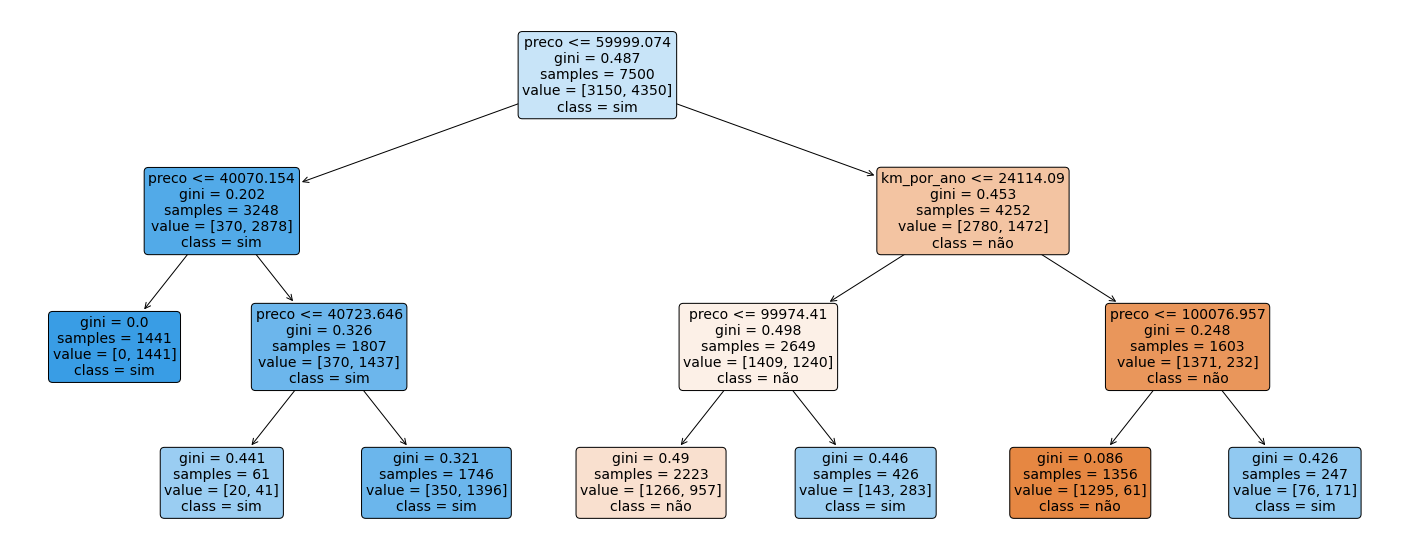

In [93]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(25,10))
a = plot_tree(modelo, 
              feature_names=x.columns, 
              filled=True, 
              rounded=True, 
              fontsize=14,
#               max_depth=3,
              class_names = ['não','sim']
             )